In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

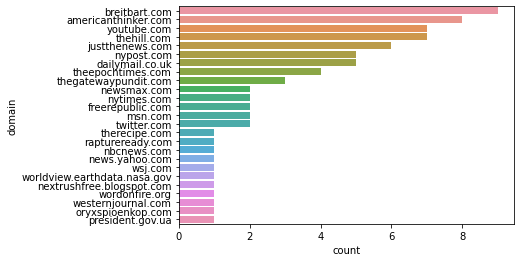

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

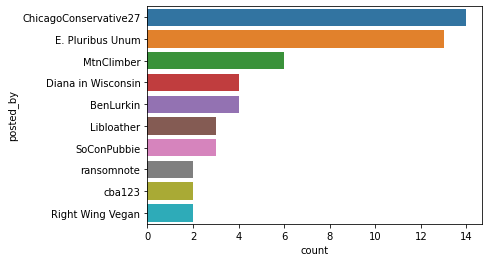

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  E. Pluribus Unum           4      1   
                     MtnClimber                 4      1   
breitbart.com        E. Pluribus Unum           1      1   
                     ChicagoConservative27      7      1   
dailymail.co.uk      Libloather                 1      1   
                     Right Wing Vegan           1      1   
justthenews.com      E. Pluribus Unum           5      1   
msn.com              cba123                     1      1   
newsmax.com          Right Wing Vegan           1      1   
nypost.com           BenLurkin                  2      1   
thegatewaypundit.com E. Pluribus Unum           1      1   
thehill.com          ChicagoConservative27      7      1   
twitter.com          ransomnote                 1      1   
youtube.com          E. Pluribus Unum           1      1   
                     ransomnote                 1      1   

                                                                       
                                                             top freq  
domain               posted_by                                         
americanthinker.com  E. Pluribus Unum        americanthinker.com    4  
                     MtnClimber              americanthinker.com    4  
breitbart.com        E. Pluribus Unum              breitbart.com    1  
                     ChicagoConservative27         breitbart.com    7  
dailymail.co.uk      Libloather                  dailymail.co.uk    1  
                     Right Wing Vegan            dailymail.co.uk    1  
justthenews.com      E. Pluribus Unum            justthenews.com    5  
msn.com              cba123                              msn.com    1  
newsmax.com          Right Wing Vegan                newsmax.com    1  
nypost.com           BenLurkin                        nypost.com    2  
thegatewaypundit.com E. Pluribus Unum       thegatewaypundit.com    1  
thehill.com          ChicagoConservative27           thehill.com    7  
twitter.com          ransomnote                      twitter.com    1  
youtube.com          E. Pluribus Unum                youtube.com    1  
                     ransomnote                      youtube.com    1

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
